In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv(r"C:\Users\Najwan\OneDrive\Desktop\Datasets\house.csv")
df = pd.DataFrame(data)
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
0,1,26.184098,1286.68,204.003817,22,67,96004.804557
1,1,34.866901,1855.25,186.980360,8,30,92473.722570
2,1,36.980709,692.09,111.224999,24,24,98112.519940
3,1,17.445723,1399.49,237.998760,1,66,92118.326874
4,1,52.587646,84.65,100.996400,20,3,98976.653176


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


In [5]:
df.describe()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,3.732823,118.941327,1090.544301,105.665358,9.397168,48.576834,95701.196185
std,2.476989,95.469802,555.325830,60.750825,7.517018,27.621465,3919.823988
min,1.000000,10.244518,11.800000,1.245338,1.000000,0.000000,86113.592974
25%,2.000000,52.240659,635.897500,56.156897,2.000000,25.000000,92934.251437
50%,3.000000,91.828201,1143.135000,101.388012,8.000000,48.000000,95337.792918
75%,5.000000,150.987591,1554.280000,148.481068,16.000000,72.000000,97980.675094
max,17.000000,750.971604,1999.840000,330.275317,24.000000,97.000000,118134.771190


In [6]:
df['net_sqm_per_bedroom'] = df['net_sqm']/df['bedroom_count']
df.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,price,net_sqm_per_bedroom
0,1,26.184098,1286.68,204.003817,22,67,96004.804557,26.184098
1,1,34.866901,1855.25,186.980360,8,30,92473.722570,34.866901
2,1,36.980709,692.09,111.224999,24,24,98112.519940,36.980709
3,1,17.445723,1399.49,237.998760,1,66,92118.326874,17.445723
4,1,52.587646,84.65,100.996400,20,3,98976.653176,52.587646


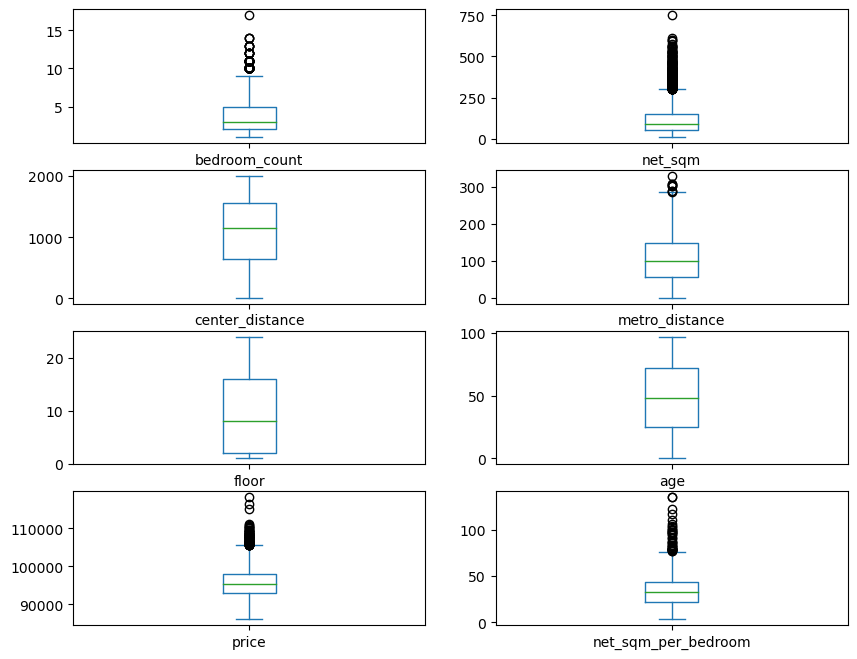

In [7]:
import math
fig, axs = plt.subplots(4,2, figsize=(10, 8))
for i,j in zip(range(0, df.shape[1]),range(0, df.shape[1])):
    
    df[df.columns[i]].plot(ax = axs[math.floor(i/2), j%2], kind = "box")
#     df.hist(column="bedroom_count")
plt.show()

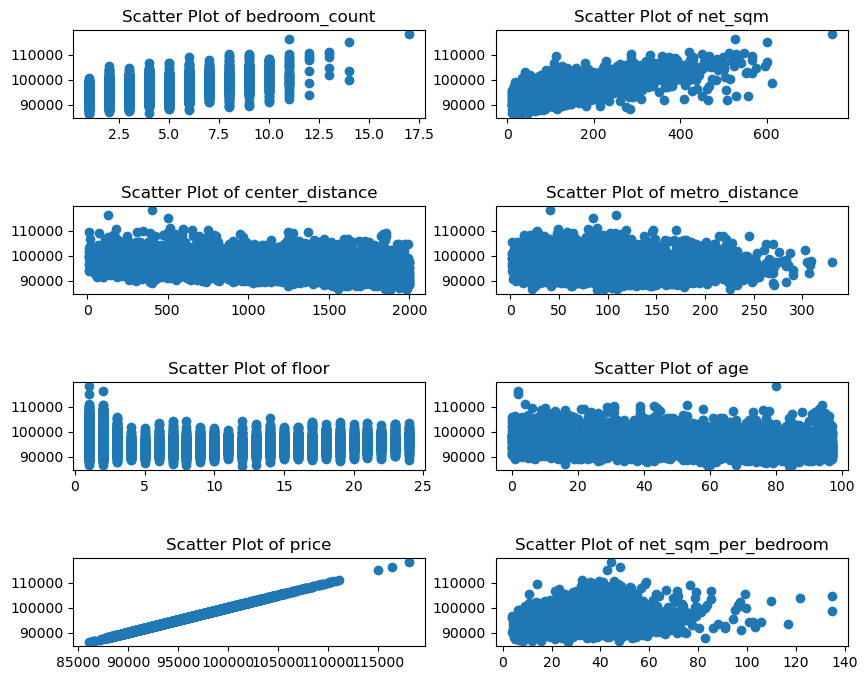

In [8]:
fig, axs = plt.subplots(4,2, figsize=(10, 8))
for i,j in zip(range(0, df.shape[1]),range(0, df.shape[1])):
    axs[math.floor(i/2), j%2].scatter(df[df.columns[i]], df.price, )
#     stats.probplot(df[df.columns[i]], dist="norm", plot=axs[math.floor(i/2), j%2])
    axs[math.floor(i/2), j%2].set_title(f'Scatter Plot of {df.columns[i]}')
# plt.title('Q-Q Plot')
plt.subplots_adjust(hspace=1)
plt.show()

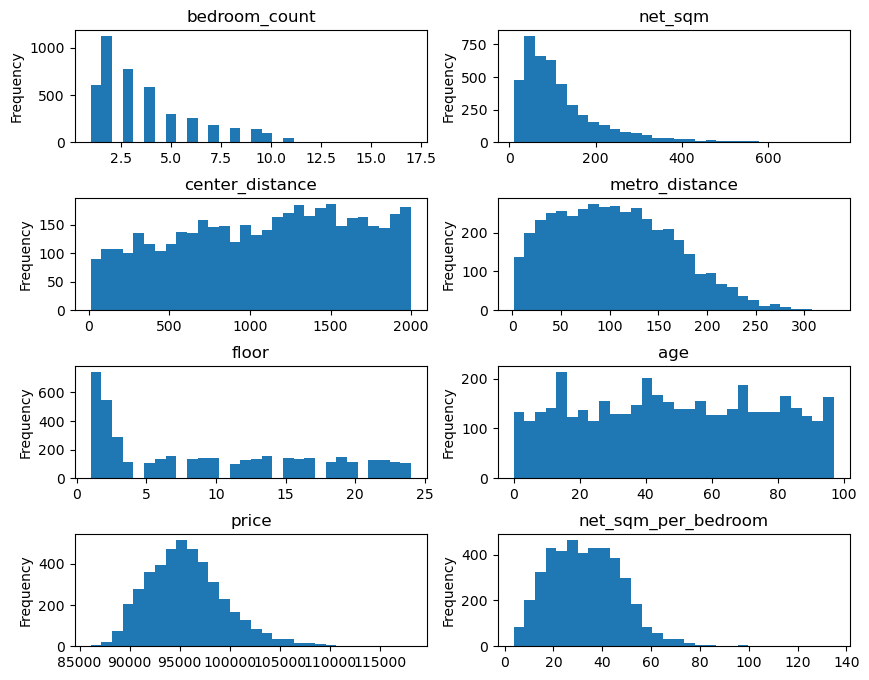

In [9]:
fig, axs = plt.subplots(4,2, figsize=(10, 8))
for i,j in zip(range(0, df.shape[1]),range(0, df.shape[1])):
    
    df[df.columns[i]].plot(ax = axs[math.floor(i/2), j%2], kind = "hist", bins = 30, title = df.columns[i])
    
plt.subplots_adjust(hspace=0.5)
plt.show()


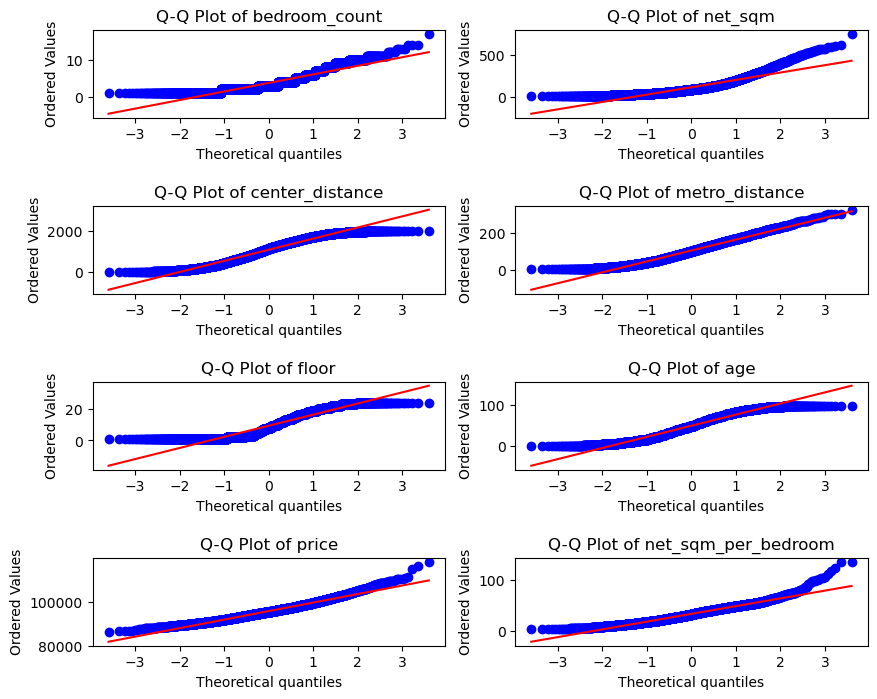

In [10]:
fig, axs = plt.subplots(4,2, figsize=(10, 8))
for i,j in zip(range(0, df.shape[1]),range(0, df.shape[1])):
    stats.probplot(df[df.columns[i]], dist="norm", plot=axs[math.floor(i/2), j%2])
    axs[math.floor(i/2), j%2].set_title(f'Q-Q Plot of {df.columns[i]}')
# plt.title('Q-Q Plot')
plt.subplots_adjust(hspace=1)
plt.show()

In [11]:
df.shape

(4308, 8)

In [12]:
# for i in df.columns:
#     df[i] = np.log(df[i]+1)
# df.head()

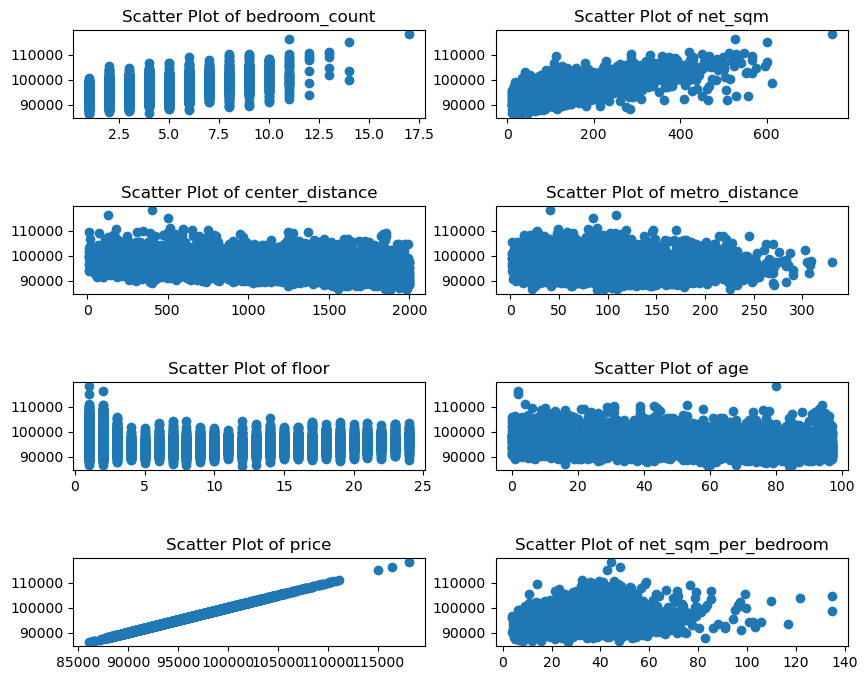

In [13]:
fig, axs = plt.subplots(4,2, figsize=(10, 8))
for i,j in zip(range(0, df.shape[1]),range(0, df.shape[1])):
    axs[math.floor(i/2), j%2].scatter(df[df.columns[i]], df.price, )
#     stats.probplot(df[df.columns[i]], dist="norm", plot=axs[math.floor(i/2), j%2])
    axs[math.floor(i/2), j%2].set_title(f'Scatter Plot of {df.columns[i]}')
# plt.title('Q-Q Plot')
plt.subplots_adjust(hspace=1)
plt.show()

In [14]:
Y = df[['price']]
Y.head()

,price
0,96004.804557
1,92473.722570
2,98112.519940
3,92118.326874
4,98976.653176


In [15]:
X = df.drop(['price'], axis = 1)
X.head()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,net_sqm_per_bedroom
0,1,26.184098,1286.68,204.003817,22,67,26.184098
1,1,34.866901,1855.25,186.980360,8,30,34.866901
2,1,36.980709,692.09,111.224999,24,24,36.980709
3,1,17.445723,1399.49,237.998760,1,66,17.445723
4,1,52.587646,84.65,100.996400,20,3,52.587646


In [16]:
X_tr, X_te, Y_tr,Y_te = train_test_split(X, Y, test_size = 0.3, random_state = 12)

In [17]:
X_tr.shape, Y_tr.shape

((3015, 7), (3015, 1))

In [18]:
X_tes,X_va, Y_tes, Y_va = train_test_split(X_te, Y_te, test_size = 0.5, random_state = 12)

In [19]:
X_tes.shape

(646, 7)

In [20]:
type(X_tr)

pandas.core.frame.DataFrame

In [21]:
X_tr.corr()

,bedroom_count,net_sqm,center_distance,metro_distance,floor,age,net_sqm_per_bedroom
bedroom_count,1.000000,0.754182,-0.013644,0.030663,-0.535433,-0.050502,-0.154195
net_sqm,0.754182,1.000000,-0.013392,0.024899,-0.403881,-0.049465,0.419277
center_distance,-0.013644,-0.013392,1.000000,0.591244,0.029656,-0.003751,-0.005978
metro_distance,0.030663,0.024899,0.591244,1.000000,0.004458,-0.002798,-0.014993
floor,-0.535433,-0.403881,0.029656,0.004458,1.000000,0.014506,0.078406
age,-0.050502,-0.049465,-0.003751,-0.002798,0.014506,1.000000,-0.002151
net_sqm_per_bedroom,-0.154195,0.419277,-0.005978,-0.014993,0.078406,-0.002151,1.000000


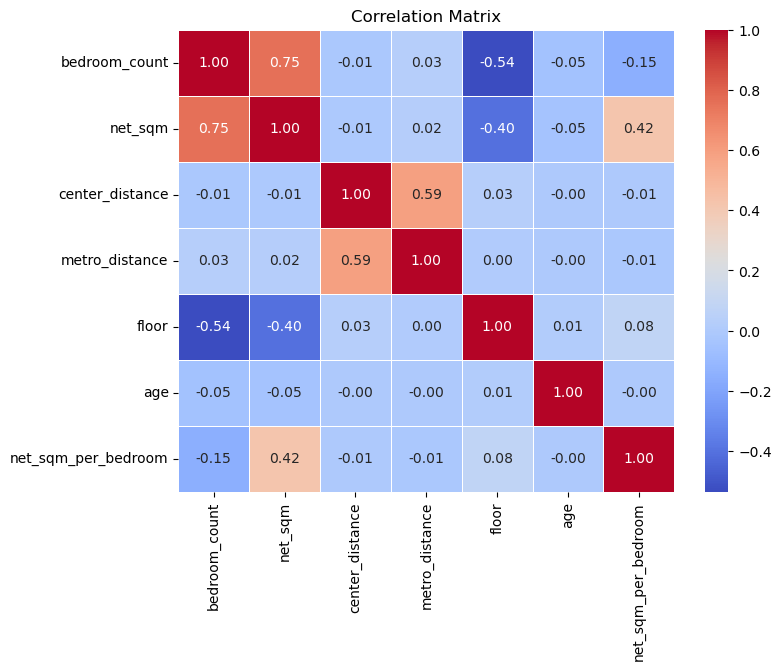

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(X_tr.corr(), cmap = "coolwarm", annot = True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [23]:
def dff(dataframe):
    return pd.DataFrame(dataframe)

In [24]:
scaler = StandardScaler()
X_tr_s = scaler.fit_transform(X_tr)
dff(X_tr_s).head()

,0,1,2,3,4,5,6
0,-0.702197,-0.232115,0.457872,-0.005762,1.410941,-0.489096,1.001878
1,-0.303116,-0.342056,-0.808818,0.641845,0.614264,0.967576,-0.291336
2,-0.702197,-0.809273,0.780738,-1.103791,1.012603,0.931159,-0.810993
3,1.692288,-0.252401,-0.774299,-0.160613,-1.111868,-0.998932,-1.405789
4,-0.303116,-0.561391,1.539356,0.293653,-0.182412,0.967576,-0.750627


In [25]:
pca = PCA(n_components=0.95)  # Keeps 95% of the variance
X_tr_pca = pca.fit_transform(X_tr_s)
dff(X_tr_pca).head()

,0,1,2,3,4,5
0,-1.134177,0.316170,1.389601,0.570432,0.474603,-0.307443
1,-0.756391,-0.114213,-0.132053,-0.906226,0.462596,1.016319
2,-1.591670,-0.214051,-0.496653,-0.800274,0.501528,-1.330563
3,1.346064,-0.615540,-2.033781,0.945282,0.097685,0.373673
4,-0.598853,1.292180,-0.790864,-0.949544,-0.272148,-0.866538


In [26]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_tr_pca, Y_tr)

LinearRegression()

In [27]:
X_te_s = scaler.transform(X_te)
X_te_s

array([[-1.10127746, -0.781615  ,  1.17690034, ...,  0.21592617,
        -1.5816004 ,  0.73887117],
       [-0.30311603, -0.88655194,  0.49621619, ...,  0.87982318,
         1.04040929, -1.4315196 ],
       [-0.70219675, -1.08287542, -0.51644651, ...,  0.34870557,
        -0.67118037, -1.67038406],
       ...,
       [-0.30311603,  0.35553198,  1.55590227, ...,  1.14538198,
        -1.29026599,  1.16942627],
       [-0.70219675, -0.80152192, -0.32183902, ...,  0.48148498,
         0.20282286, -0.78664522],
       [-0.30311603, -0.28748734,  1.61416723, ...,  0.87982318,
        -1.03534838, -0.17706766]])

In [28]:
X_te_pca = pca.transform(X_te_s)
dff(X_te_pca)

,0,1,2,3,4,5
0,-1.068503,2.393723,0.756681,1.575332,-0.815336,0.836789
1,-1.379711,0.325610,-1.196539,-0.915173,0.742962,-0.430771
2,-1.406117,-1.094188,-1.540457,0.786020,0.104100,-0.382065
3,-0.080965,1.239655,1.877368,-0.761341,0.223336,0.118969
4,-1.067512,1.349047,-1.156223,0.932423,1.077255,0.294807
...,...,...,...,...,...,...
1288,-0.954495,-0.349875,-0.391147,1.163252,-0.261206,-0.371441
1289,-0.733619,0.270034,0.096474,1.403753,1.266557,-0.704141
1290,-0.336022,2.008052,1.582909,1.308908,0.462561,-0.188452
1291,-1.251125,-0.566729,-0.643632,-0.113454,0.101087,-0.103487


In [29]:
ytrpred = mlr.predict(X_tr_pca)
ypred = mlr.predict(X_te_pca)
dff(ypred).head()

,0
0,93224.259304
1,92156.228522
2,93336.773329
3,96081.847404
4,94715.111458


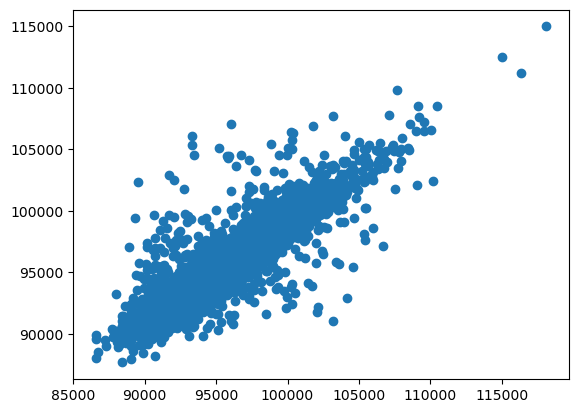

In [30]:
plt.scatter(Y_tr, ytrpred)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse_tr = mean_squared_error(Y_tr, ytrpred)
mse_te = mean_squared_error(Y_te, ypred)
print(f"mean squared error for training set is : {mse_tr:.2f} and for test set :{mse_te:.2f}")

mean squared error for training set is : 4151379.47 and for test set :4732039.42


In [32]:
r2_te = r2_score(Y_te, ypred)
r2_te

0.6810971165384734

In [33]:
vif = 1/(1-r2_te)
vif

3.1357508879992393

In [34]:
X_va_s = scaler.transform(X_va)
dff(X_va_s).head()

,0,1,2,3,4,5,6
0,0.495045,1.714665,-1.742266,-0.216001,-1.111868,1.695912,1.534443
1,0.095965,0.330044,0.225696,0.058806,0.879823,-0.015678,0.290265
2,-0.303116,0.060281,0.136107,0.398442,0.747044,0.348490,0.551166
3,-0.303116,-0.018282,0.396522,-0.308226,-0.846309,1.295327,0.386653
4,-0.702197,-0.524635,1.107556,0.835248,-0.580750,1.695912,0.083064


In [35]:
X_va_pca = pca.transform(X_va_s)
dff(X_va_pca).head()

,0,1,2,3,4,5
0,1.983237,-1.439030,1.390682,-1.844530,-0.438138,1.064437
1,-0.141705,0.214958,0.598925,0.057677,0.762028,-0.148122
2,-0.471777,0.372186,0.790689,-0.313142,0.370182,0.185400
3,0.169346,0.020176,0.149423,-1.353452,-0.888602,-0.460372
4,-0.563208,1.330401,-0.090066,-1.724764,-0.904121,-0.139828


In [36]:
ypred_va = mlr.predict(X_va_pca)
dff(ypred_va).head()

,0
0,101114.101364
1,97013.737052
2,96036.983985
3,92817.571057
4,90329.155185


In [37]:
mse_va = mean_squared_error(Y_va, ypred_va)
mse_va

4462313.889088762

In [38]:
r2_va = r2_score(Y_va, ypred_va)
print(f"R2 value in validation set is {r2_va:.4f}")

R2 value in validation set is 0.6774


In [39]:
vif_va = 1/(1-r2_va)
vif_va

3.1002939629017163

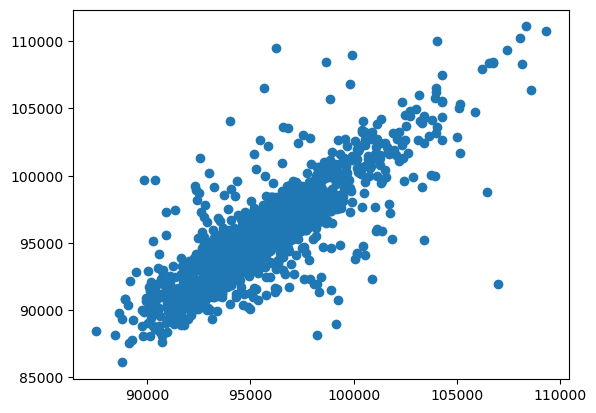

In [40]:
# plt.plot(dff(ypred), color = 'red')
# plt.plot(dff(Y_te), color = 'blue')
plt.scatter(ypred, Y_te)
plt.show()

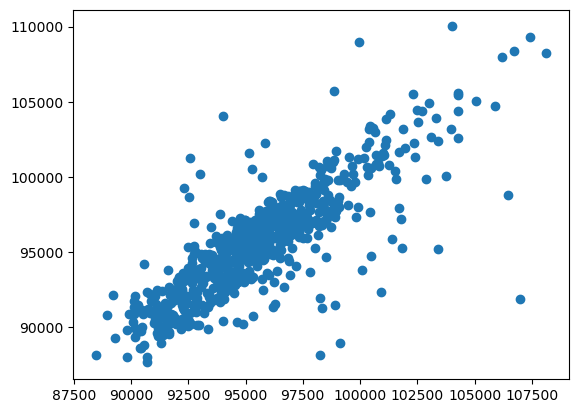

In [41]:
plt.scatter(ypred_va, Y_va)
plt.show()

Even though the model performs well still need a improvement

In [42]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [43]:
param = {'alpha':[0.001,0.01,0.1,1,10,100]}
lasso_grid = GridSearchCV(Lasso(), param, cv=5)
lasso_grid.fit(X_tr_pca, Y_tr)
best_alpha = lasso_grid.best_params_['alpha']
print(best_alpha)

1


In [44]:
lasso = Lasso(alpha = best_alpha)
lasso.fit(X_tr_pca, Y_tr)
ypred_l = lasso.predict(X_te_pca)
mse_l = mean_squared_error(Y_te,ypred_l)
r2_l = r2_score(Y_te, ypred_l)
print(f"mse value is {mse_l}, r2 value is {r2_l:.4f}")

mse value is 4731328.995105484, r2 value is 0.6811


In [45]:
ypred_va_l = lasso.predict(X_va_pca)
mse_ll = mean_squared_error(Y_va,ypred_va_l)
r2_ll = r2_score(Y_va, ypred_va_l)
print(f"mse value is {mse_ll}, r2 value is {r2_ll:.4f}")

mse value is 4461581.257812064, r2 value is 0.6775


There is no any improvement using lasso regularization

In [46]:
param = {'alpha':[0.001,0.01,0.1,1,10,100]}
ridge_grid = GridSearchCV(Ridge(), param, cv=5)
ridge_grid.fit(X_tr_pca, Y_tr)
best_alpha_r = ridge_grid.best_params_['alpha']
print(best_alpha_r)

10


In [47]:
ridge = Ridge(alpha = best_alpha_r)
ridge.fit(X_tr_pca, Y_tr)
ypred_l_r = ridge.predict(X_te_pca)
mse_l_r = mean_squared_error(Y_te,ypred_l_r)
r2_l_r = r2_score(Y_te, ypred_l_r)
print(f"mse value is {mse_l_r}, r2 value is {r2_l_r:.4f}")

mse value is 4728744.521662994, r2 value is 0.6813


In [48]:
ypred_va_l_r = ridge.predict(X_va_pca)
mse_ll_r = mean_squared_error(Y_va,ypred_va_l_r)
r2_ll_r = r2_score(Y_va, ypred_va_l_r)
print(f"mse value is {mse_ll_r}, r2 value is {r2_ll_r:.4f}")

mse value is 4459033.291962275, r2 value is 0.6777


In [51]:
!pip install joblib
import joblib

# Assuming 'model' is your trained model
joblib.dump(mlr, 'mlr.pkl')

['mlr.pkl']

In the validation set only a 0.002 improvement so there is no need of regularization or polynomial features the main cause of the low r2 value is there is no enough data

In [52]:
import streamlit as st
import joblib

# Load the trained model
model = joblib.load('mlr.pkl')

# Streamlit UI
st.title('House Price Prediction App')

# User input for predictions
bedrooms = st.number_input('Enter the number of bedrooms:', min_value=1, max_value=10)
net_sqm = st.number_input('Enter the net square meters:', min_value=20, max_value=500)
center_distance = st.number_input('Enter the center distance (in meters):', min_value=1, max_value=3000)
floor = st.number_input('Enter the floor number:', min_value=1, max_value=50)

# Prediction
if st.button('Make Prediction'):
    input_data = [[bedrooms, net_sqm, center_distance, floor]]
    prediction = model.predict(input_data)
    
    st.write(f"Predicted Price: ${prediction[0]:,.2f}")


2024-11-23 19:01:52.324 
  command:

    streamlit run C:\Users\Najwan\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [55]:
!streamlit run model.py


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: model.py


In [56]:
import os
os.getcwd()


'C:\\Users\\Najwan'

In [57]:
df.to_csv('data.csv')  # Saves the file in the current directory